## Import python libraries:

To clean this dataset, let's import the python libraries we pip installed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Read in csv file:

Next, we'll read in the second csv file. We'll call this dataframe 'df_newstats' since it contains the data on the most recent trending YouTubers.

In [2]:
df_newstats = pd.read_csv('datadump/Youtubers.csv')

df_newstats.head()

,Rank,Channel Name,Category,Subscribers,Country,Average Views,Average Likes,Average Comments,Content Type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,T-Series,Music & Dance,258.4M,India,135.2K,5.6K,223,NaN
2,2.0,MrBeast,Video games,236.1M,United States,104M,4M,74K,Humor
3,3.0,Cocomelon - Nursery Rhymes,Education,171.4M,United States,5.1M,57.1K,0,NaN
4,4.0,SET India,NaN,167.1M,India,27.9K,996,7,NaN


I already see we have some null values we'll have to take care of, but let's get an overview on the number of columns and rows before cleaning the data:

In [3]:
cols = len(df_newstats.axes[1])
rows = len(df_newstats.axes[0])
print("Number of columns before cleaning data: ", cols)
print("Number of rows before cleaning data: ", rows)

Number of columns before cleaning data:  9
Number of rows before cleaning data:  1046


## Data cleaning commences:

In [4]:
#start the data cleaning by deleting that first null value row
df_newstats.drop(df_newstats.index[0], axis=0, inplace=True)

#then reducing our data to the top 50 Youtubers. Since we dropped that first null row, we now only have 1045 rows:
df_newstats.drop(df_newstats.index[range(50, 1045)], axis=0, inplace=True)

#resetting default index after removing first row
df_newstats.reset_index(inplace = True, drop = True)

#then setting the dataframe options to display ALL cols and rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#now let's drop repeat columns we won't need when combining both tables to make comparisons
df_newstats = df_newstats.drop(columns = ['Content Type'])

#let's display the column names that are left in the dataset now
df_newstats.columns.values

array(['Rank', 'Channel Name', 'Category', 'Subscribers', 'Country',
       'Average Views', 'Average Likes', 'Average Comments'], dtype=object)

## Rename columns:

In [5]:
#let's go ahead and rename the columns for this time period
df_newstats = df_newstats.rename(columns = {"Channel Name":"'24 YouTubers",
                                            "Category" : "'24 Category",
                                            "Subscribers":"'24 Subs", 
                                            "Country":"'24 Country",
                                            "Average Views":"'24 Avg. Views",
                                            "Average Likes":"'24 Avg. Likes",
                                            "Average Comments":"'24 Avg. Comments"})
#now let's see what we're working with
df_newstats.head(None)

,Rank,'24 YouTubers,'24 Category,'24 Subs,'24 Country,'24 Avg. Views,'24 Avg. Likes,'24 Avg. Comments
0,1.0,T-Series,Music & Dance,258.4M,India,135.2K,5.6K,223
1,2.0,MrBeast,Video games,236.1M,United States,104M,4M,74K
2,3.0,Cocomelon - Nursery Rhymes,Education,171.4M,United States,5.1M,57.1K,0
3,4.0,SET India,NaN,167.1M,India,27.9K,996,7
4,5.0,✿ Kids Diana Show,Animation,118.5M,NaN,5.1M,14.3K,0
5,6.0,Like Nastya,Toys,112.6M,NaN,3.4M,45.9K,0
6,7.0,PewDiePie,Movies,111.6M,United States,1.7M,109.2K,3.1K
7,8.0,Vlad and Niki,Animation,109.6M,NaN,5.8M,42.7K,0
8,9.0,Zee Music Company,Music & Dance,104.5M,India,38K,1.6K,26
9,10.0,WWE,Video games,99M,United States,182.9K,6.8K,227


## Additions reimplemented:

After comparing our values to the other dataset and doing some research, I realized **BLACKPINK**, **Justin Bieber**, **Ed Sheeran**, and **Taylor Swift** were missing by mistake. <br> As a ***swifty*** would say, "*I don't know about you, but I'm feeling data, too!*" <br> Or as a ***sheeraner*** would say, "*I'm in love with the shape of data!*" <br> Or as a ***blinker*** would say, "*Let's kill this dataset!*" <br> Or as a ***belieber*** would say, "*Is it too late now to save data?*" <br> Now that I've had my fun, let's add them back to this dataset!

In [6]:
#adding new rows of missing youtubers and their values to the bottom of the dataset
df_newstats.loc[len(df_newstats)] = {"Rank": 12, 
                                     "'24 YouTubers" : "BLACKPINK",
                                     "'24 Category" : "Music & Dance",
                                     "'24 Subs" : "93.2M", 
                                     "'24 Country" : "South Korea",
                                     "'24 Avg. Views" : "1.9M",
                                     "'24 Avg. Likes" : "439.2K", 
                                     "'24 Avg. Comments" : "16.7K"}
df_newstats.loc[len(df_newstats)] = {"Rank": 18, 
                                     "'24 YouTubers" : "Justin Bieber",
                                     "'24 Category" : "Music & Dance",
                                     "'24 Subs" : "72.6M", 
                                     "'24 Country" : "Canada",
                                     "'24 Avg. Views" : "596K",
                                     "'24 Avg. Likes" : "211.2K", 
                                     "'24 Avg. Comments" : "7.4K"}
df_newstats.loc[len(df_newstats)] = {"Rank": 36, 
                                     "'24 YouTubers" : "Taylor Swift", 
                                     "'24 Category" : "Music & Dance",
                                     "'24 Subs" : "56.6M", 
                                     "'24 Country" : "United States",
                                     "'24 Avg. Views" : "2.3M",
                                     "'24 Avg. Likes" : "188.5K", 
                                     "'24 Avg. Comments" : "6K"}
df_newstats.loc[len(df_newstats)] = {"Rank": 39, 
                                     "'24 YouTubers" : "Ed Sheeran", 
                                     "'24 Category" : "Music & Dance",
                                     "'24 Subs" : "54.3M", 
                                     "'24 Country" : "United Kindom",
                                     "'24 Avg. Views" : "278.5K",
                                     "'24 Avg. Likes" : "15.5K", 
                                     "'24 Avg. Comments" : "364"}

In [7]:
#display tail end of dataset where new rows are located
df_newstats.tail(4)

,Rank,'24 YouTubers,'24 Category,'24 Subs,'24 Country,'24 Avg. Views,'24 Avg. Likes,'24 Avg. Comments
50,12.0,BLACKPINK,Music & Dance,93.2M,South Korea,1.9M,439.2K,16.7K
51,18.0,Justin Bieber,Music & Dance,72.6M,Canada,596K,211.2K,7.4K
52,36.0,Taylor Swift,Music & Dance,56.6M,United States,2.3M,188.5K,6K
53,39.0,Ed Sheeran,Music & Dance,54.3M,United Kindom,278.5K,15.5K,364


## Convert columns to float values:

Now we'll have to go through and repeat a couple steps since we've added the missing top YouTubers to this dataset. First, we'll need to convert our millions (M) and thousands (K) to usable integers for the sort. Second, we'll sort the YouTubers based on their subscribers count. Then, create a new ranking column and drop the old one along with renaming the columns. Finally, we'll drop the remaining four youtubers who didn't make the top 50 cut! Let's get to it!

In [8]:
#create a def of converter to replace 'K' and 'M' values
def converter(x):
    if "K" in x:
        return f"{(float(x.strip("K"))*1000):.0f}"
    elif "M" in x:
        return f"{(float(x.strip("M"))*1000000):.0f}"
    elif not x == "K":
        return x
    elif not x == "M":
        return x
        
#then create a list of columns to convert
convr_cols = ["'24 Subs", "'24 Avg. Views", "'24 Avg. Likes", "'24 Avg. Comments"]

#then create a for loop adding the list and applying the defined converter
for column in convr_cols:
    df_newstats[column] = df_newstats[column].apply(converter)

df_newstats.head()

,Rank,'24 YouTubers,'24 Category,'24 Subs,'24 Country,'24 Avg. Views,'24 Avg. Likes,'24 Avg. Comments
0,1.0,T-Series,Music & Dance,258400000,India,135200,5600,223
1,2.0,MrBeast,Video games,236100000,United States,104000000,4000000,74000
2,3.0,Cocomelon - Nursery Rhymes,Education,171400000,United States,5100000,57100,0
3,4.0,SET India,NaN,167100000,India,27900,996,7
4,5.0,✿ Kids Diana Show,Animation,118500000,NaN,5100000,14300,0


## Sort 2024 YouTubers:

Looks like we'll also need to sort our top 50 YouTubers after adding the missing YouTubers to the list.

In [9]:
#let's just go ahead and make sure all of our number columns are converted to integers before trying to sort any
df_newstats[["'24 Subs", "'24 Avg. Views", "'24 Avg. Likes", "'24 Avg. Comments"]] = df_newstats[["'24 Subs", "'24 Avg. Views", "'24 Avg. Likes", "'24 Avg. Comments"]].apply(pd.to_numeric)

#sort the 2024 YouTubers based on our new additions!
df_newstats = df_newstats.sort_values("'24 Subs", ascending=False)

#brief overview of the top 20 YouTubers to be sure our sorting worked
df_newstats.head(20)

,Rank,'24 YouTubers,'24 Category,'24 Subs,'24 Country,'24 Avg. Views,'24 Avg. Likes,'24 Avg. Comments
0,1.0,T-Series,Music & Dance,258400000,India,135200,5600,223
1,2.0,MrBeast,Video games,236100000,United States,104000000,4000000,74000
2,3.0,Cocomelon - Nursery Rhymes,Education,171400000,United States,5100000,57100,0
3,4.0,SET India,NaN,167100000,India,27900,996,7
4,5.0,✿ Kids Diana Show,Animation,118500000,NaN,5100000,14300,0
5,6.0,Like Nastya,Toys,112600000,NaN,3400000,45900,0
6,7.0,PewDiePie,Movies,111600000,United States,1700000,109200,3100
7,8.0,Vlad and Niki,Animation,109600000,NaN,5800000,42700,0
8,9.0,Zee Music Company,Music & Dance,104500000,India,38000,1600,26
9,10.0,WWE,Video games,99000000,United States,182900,6800,227


## Ranking 2024 Subs:

I wanted to save the ranking for last (like we did in the 2023 dataset) but because of the additions we've made and the sorting thereafter, this dataset will be easier to continue cleaning by resetting the index and then ranking the YouTubers based on their subscribers. <br> So now we'll create an updated ranking of our top 50 YouTubers for 2024:

In [10]:
#reset index again and drop old one
df_newstats = df_newstats.reset_index(drop=True)

#create the new 2024 ranking and convert to int64 data type
df_newstats["'24 Rank"] = df_newstats["'24 Subs"].rank(method='first', ascending=False)
df_newstats["'24 Rank"] = df_newstats["'24 Rank"].astype("int64")

#make sure the data type was changed and check the other data types, as well
print(df_newstats.dtypes)

df_newstats.head(5)

Rank                 float64
'24 YouTubers         object
'24 Category          object
'24 Subs               int64
'24 Country           object
'24 Avg. Views         int64
'24 Avg. Likes         int64
'24 Avg. Comments      int64
'24 Rank               int64
dtype: object


,Rank,'24 YouTubers,'24 Category,'24 Subs,'24 Country,'24 Avg. Views,'24 Avg. Likes,'24 Avg. Comments,'24 Rank
0,1.0,T-Series,Music & Dance,258400000,India,135200,5600,223,1
1,2.0,MrBeast,Video games,236100000,United States,104000000,4000000,74000,2
2,3.0,Cocomelon - Nursery Rhymes,Education,171400000,United States,5100000,57100,0,3
3,4.0,SET India,NaN,167100000,India,27900,996,7,4
4,5.0,✿ Kids Diana Show,Animation,118500000,NaN,5100000,14300,0,5


##### The data type changed to int64 and all other data types look good. We're about to drop the old rank column so it's data type is irrelevant. <br> One less thing to worry about!

In [11]:
#now we can drop the old rank column and reorder with the new rank column based on indexes
df_newstats = df_newstats.drop(columns = ["Rank"])
df_newstats = df_newstats.iloc[:,[7,0,1,2,3,4,5,6]]

#drop rows to shorten data to the top 50 youtubers using a range
df_newstats.drop(df_newstats.index[range(50, 54)], axis=0, inplace=True)

df_newstats.head(None)

,'24 Rank,'24 YouTubers,'24 Category,'24 Subs,'24 Country,'24 Avg. Views,'24 Avg. Likes,'24 Avg. Comments
0,1,T-Series,Music & Dance,258400000,India,135200,5600,223
1,2,MrBeast,Video games,236100000,United States,104000000,4000000,74000
2,3,Cocomelon - Nursery Rhymes,Education,171400000,United States,5100000,57100,0
3,4,SET India,NaN,167100000,India,27900,996,7
4,5,✿ Kids Diana Show,Animation,118500000,NaN,5100000,14300,0
5,6,Like Nastya,Toys,112600000,NaN,3400000,45900,0
6,7,PewDiePie,Movies,111600000,United States,1700000,109200,3100
7,8,Vlad and Niki,Animation,109600000,NaN,5800000,42700,0
8,9,Zee Music Company,Music & Dance,104500000,India,38000,1600,26
9,10,WWE,Video games,99000000,United States,182900,6800,227


## Cont.' data cleaning:

Ok, now let's update the '24 Category column to match similar category values from our 2023 dataset so we have more accurate comparisons. <br> Then we'll fill in the null values under the '24 Countries column.

This is going to turn into a lot of cleaning so hang in there with me! A lot of these values were inaccurate or misrepresented, so quite a few individual changes needed to be made.

In [12]:
#first we'll use .loc method to change the category of values that are similar in context but were worded differently
df_newstats.loc[(df_newstats["'24 Category"] == "Toys"), ["'24 Category"]] = "Educational"
df_newstats.loc[(df_newstats["'24 Category"] == "Animation"), ["'24 Category"]] = "Educational"
df_newstats.loc[(df_newstats["'24 Category"] == "Movies"), ["'24 Category"]] = "Film & Animation"

#now we can change the individual values that are either incorrect or null
#made corrections using .at method based off index and column name
df_newstats.at[1, "'24 Category"] = "Entertainment"
df_newstats.at[2, "'24 Category"] = "Educational"
df_newstats.at[3, "'24 Category"] = "Film & Animation"
df_newstats.at[6, "'24 Category"] = "Entertainment"
df_newstats.at[9, "'24 Category"] = "Sports"
df_newstats.at[10, "'24 Category"] = "Film & Animation"
df_newstats.at[13, "'24 Category"] = "DIY & Tutorials"
df_newstats.at[15, "'24 Category"] = "Film & Animation"
df_newstats.at[19, "'24 Category"] = "Film & Animation"
df_newstats.at[25, "'24 Category"] = "Educational"
df_newstats.at[29, "'24 Category"] = "Sports"
df_newstats.at[31, "'24 Category"] = "Educational"
df_newstats.at[32, "'24 Category"] = "Music & Dance"
df_newstats.at[36, "'24 Category"] = "Educational"
df_newstats.at[40, "'24 Category"] = "Film & Animation"
df_newstats.at[41, "'24 Category"] = "Educational"
df_newstats.at[42, "'24 Category"] = "Entertainment"
df_newstats.at[43, "'24 Category"] = "Film & Animation"
df_newstats.at[46, "'24 Category"] = "Gaming"
df_newstats.at[48, "'24 Category"] = "Music & Dance"
df_newstats.at[49, "'24 Category"] = "Gaming"
df_newstats.at[6, "'24 Country"] = "Japan"
df_newstats.at[13, "'24 Country"] = "United States"
df_newstats.at[14, "'24 Country"] = "South Korea"
df_newstats.at[16, "'24 Country"] = "South Korea"
df_newstats.at[42, "'24 Country"] = "Belarus"
df_newstats.at[46, "'24 Country"] = "Chile"
df_newstats.at[49, "'24 Country"] = "Spain"

#let's display what we have now
df_newstats.head(None)

,'24 Rank,'24 YouTubers,'24 Category,'24 Subs,'24 Country,'24 Avg. Views,'24 Avg. Likes,'24 Avg. Comments
0,1,T-Series,Music & Dance,258400000,India,135200,5600,223
1,2,MrBeast,Entertainment,236100000,United States,104000000,4000000,74000
2,3,Cocomelon - Nursery Rhymes,Educational,171400000,United States,5100000,57100,0
3,4,SET India,Film & Animation,167100000,India,27900,996,7
4,5,✿ Kids Diana Show,Educational,118500000,NaN,5100000,14300,0
5,6,Like Nastya,Educational,112600000,NaN,3400000,45900,0
6,7,PewDiePie,Entertainment,111600000,Japan,1700000,109200,3100
7,8,Vlad and Niki,Educational,109600000,NaN,5800000,42700,0
8,9,Zee Music Company,Music & Dance,104500000,India,38000,1600,26
9,10,WWE,Sports,99000000,United States,182900,6800,227


## Null values:

Much better! Now all that's left is to fill-in the rest of those pesky null values.

In [13]:
#let's create a similar boolean mask like we did in the 2023 dataset to expose those null values based on their rows
new_boo_mask = df_newstats.isnull().any(axis=1)
nulls_exposed = df_newstats[new_boo_mask]
nulls_exposed.head(None)

,'24 Rank,'24 YouTubers,'24 Category,'24 Subs,'24 Country,'24 Avg. Views,'24 Avg. Likes,'24 Avg. Comments
4,5,✿ Kids Diana Show,Educational,118500000,NaN,5100000,14300,0
5,6,Like Nastya,Educational,112600000,NaN,3400000,45900,0
7,8,Vlad and Niki,Educational,109600000,NaN,5800000,42700,0
18,19,Pinkfong Baby Shark - Kids' Songs & Stories,Educational,72500000,NaN,637600,713,0
20,21,ChuChu TV Nursery Rhymes & Kids Songs,Educational,69800000,NaN,762200,15500,0
25,26,El Reino Infantil,Educational,62400000,NaN,720800,3000,0
28,29,Wave Music,Music & Dance,60500000,NaN,32800,746,59
31,32,Infobells - Hindi,Educational,59100000,NaN,1300000,3800,0
37,38,BillionSurpriseToys - Nursery Rhymes & Cartoons,Educational,55200000,NaN,82800,0,0
41,42,Toys and Colors,Educational,51100000,NaN,4800000,2800,0


In [14]:
#compared the 2023 dataset and filled individual null values using index and column name
df_newstats.at[4, "'24 Country"] = "United States"
df_newstats.at[5, "'24 Country"] = "Russia"
df_newstats.at[7, "'24 Country"] = "United States"
df_newstats.at[18, "'24 Country"] = "United States"
df_newstats.at[20, "'24 Country"] = "India"
df_newstats.at[25, "'24 Country"] = "Argentina"
df_newstats.at[28, "'24 Country"] = "India"
df_newstats.at[31, "'24 Country"] = "India"
df_newstats.at[37, "'24 Country"] = "United States"
df_newstats.at[41, "'24 Country"] = "United States"
df_newstats.at[45, "'24 Country"] = "Russia"

#display indexes to see corrections using .iloc method
df_newstats.iloc[[4, 5, 7, 18, 20, 25, 28, 31, 37, 41, 45]]

,'24 Rank,'24 YouTubers,'24 Category,'24 Subs,'24 Country,'24 Avg. Views,'24 Avg. Likes,'24 Avg. Comments
4,5,✿ Kids Diana Show,Educational,118500000,United States,5100000,14300,0
5,6,Like Nastya,Educational,112600000,Russia,3400000,45900,0
7,8,Vlad and Niki,Educational,109600000,United States,5800000,42700,0
18,19,Pinkfong Baby Shark - Kids' Songs & Stories,Educational,72500000,United States,637600,713,0
20,21,ChuChu TV Nursery Rhymes & Kids Songs,Educational,69800000,India,762200,15500,0
25,26,El Reino Infantil,Educational,62400000,Argentina,720800,3000,0
28,29,Wave Music,Music & Dance,60500000,India,32800,746,59
31,32,Infobells - Hindi,Educational,59100000,India,1300000,3800,0
37,38,BillionSurpriseToys - Nursery Rhymes & Cartoons,Educational,55200000,United States,82800,0,0
41,42,Toys and Colors,Educational,51100000,United States,4800000,2800,0


In [15]:
#let's see if any null values still exists. False = no and True = yes.
df_newstats.isnull().values.any()

False

## Reorder columns:

Finally, we'll reorder the columns so the 2024 dataset matches up better to the 2023 dataset.

In [16]:
#let's reset the index and drop the old one (for the last time) to make this a little less complicated when moving columns around
df_newstats = df_newstats.reset_index(drop=True)
#relocating columns using .iloc method
df_newstats = df_newstats.iloc[:, [0,1,3,5,6,7,2,4]]

df_newstats.head(None)

,'24 Rank,'24 YouTubers,'24 Subs,'24 Avg. Views,'24 Avg. Likes,'24 Avg. Comments,'24 Category,'24 Country
0,1,T-Series,258400000,135200,5600,223,Music & Dance,India
1,2,MrBeast,236100000,104000000,4000000,74000,Entertainment,United States
2,3,Cocomelon - Nursery Rhymes,171400000,5100000,57100,0,Educational,United States
3,4,SET India,167100000,27900,996,7,Film & Animation,India
4,5,✿ Kids Diana Show,118500000,5100000,14300,0,Educational,United States
5,6,Like Nastya,112600000,3400000,45900,0,Educational,Russia
6,7,PewDiePie,111600000,1700000,109200,3100,Entertainment,Japan
7,8,Vlad and Niki,109600000,5800000,42700,0,Educational,United States
8,9,Zee Music Company,104500000,38000,1600,26,Music & Dance,India
9,10,WWE,99000000,182900,6800,227,Sports,United States


## Create new csv:

Excellent! Now to create a new csv with the cleaned up dataframe.

In [17]:
#write the csv file into the cleaned_data folder
#commented out the code below to avoid creating another newstats csv file
#df_newstats.to_csv('cleaned_data/newstats.csv', index=False)

## Visualizations:

Let's do some quick visuals of the 2024 YouTuber Analysis before merging/joining our datasets!

### '24 Countries Pie Chart:

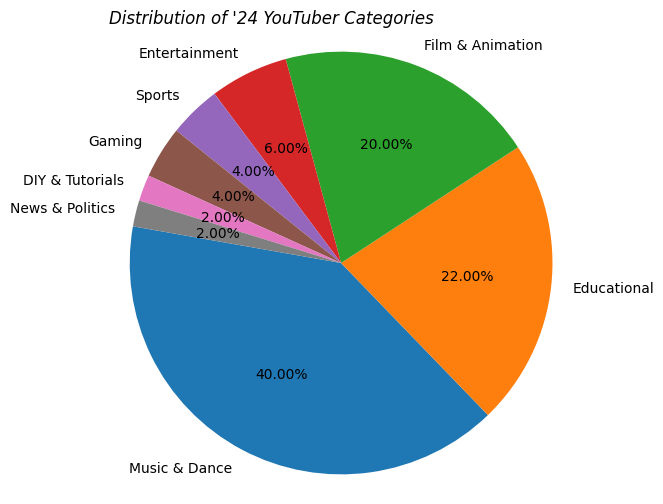

In [18]:
#group by country and calculate the total number for each country
count_newcat = df_newstats["'24 Category"].value_counts()

#now we can create a pie plot on the percentage breakdown of all categories
plt.figure(figsize=(6, 6))
plt.pie(count_newcat, labels=count_newcat.index, autopct='%1.2f%%', startangle=170)
plt.title("Distribution of '24 YouTuber Categories", loc="left", fontstyle='italic')
#the equal aspect ratio will ensure the pie plot is circular
plt.axis("equal")
plt.show()